In [62]:
import os
import re
import boto3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [46]:
s3_client = boto3.client('s3')
response = s3_client.list_objects_v2(
    Bucket='clovis-phytopipe-inout',
    Prefix='output/',
    Delimiter="/")
all_dates = []
for prefix in response['CommonPrefixes']:

    if prefix['Prefix'] == 'output/P27_Under_098/':
        continue
    
    date_in_prefix = re.findall(r'[2024\d]+\/', prefix['Prefix'])[0].replace('/','')
    all_dates.append(f"{date_in_prefix[:4]}-{date_in_prefix[4:6]}-{date_in_prefix[6:8]}")

all_dates = pd.Series(all_dates).unique()
all_dates.sort()
all_dates

array(['2024-01-20', '2024-01-24', '2024-01-25', '2024-01-29',
       '2024-02-04', '2024-02-21', '2024-02-28', '2024-03-04',
       '2024-03-14', '2024-03-17', '2024-03-24', '2024-03-25',
       '2024-04-07', '2024-04-08', '2024-05-06', '2024-05-27',
       '2024-06-15', '2024-06-16', '2024-09-01'], dtype=object)

In [56]:
df = pd.read_csv("./costs.csv")
del df['Total costs($)']
del df['S3($)']

df = df.loc[df['Service'].isin(all_dates)]
df = df.rename(columns={'Service': 'Date',
                        'EC2-Other($)':'EBS Cost',
                        'EC2-Instances($)': 'EC2 Cost'})
df

,Date,EBS Cost,EC2 Cost
20,2024-01-20,12.713701,52.988713
24,2024-01-24,8.886167,20.361848
25,2024-01-25,11.200666,33.521317
29,2024-01-29,10.136764,19.720007
35,2024-02-04,12.398974,37.673447
52,2024-02-21,10.463879,44.132528
59,2024-02-28,43.684472,29.773239
64,2024-03-04,56.195820,42.098525
74,2024-03-14,104.116384,56.878928
77,2024-03-17,21.324146,13.567933


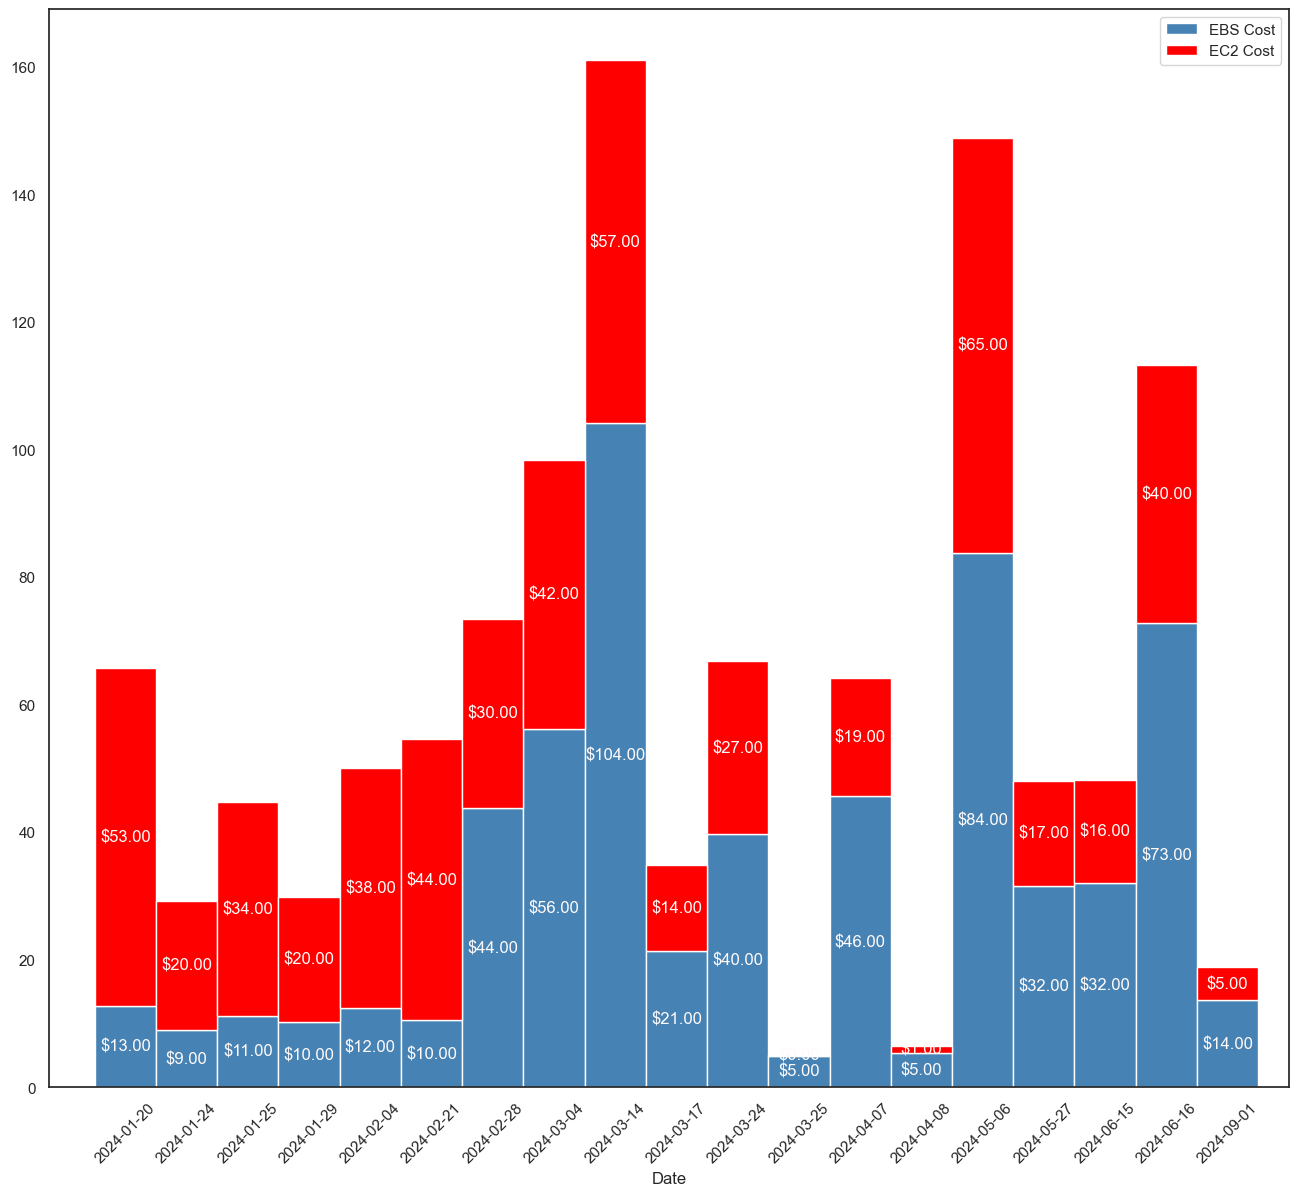

In [108]:
sns.set(style='white')
# bar1 = sns.barplot(x="Date", y="EBS Cost", data=df, color='darkblue')
# bar2 = sns.barplot(x="Date", y="EC2 Cost", data=df, color='lightblue')

# # add legend
# top_bar = mpatches.Patch(color='darkblue', label='EBS Cost')
# bottom_bar = mpatches.Patch(color='lightblue', label='EC2 Cost')
# plt.legend(handles=[top_bar, bottom_bar])


# # show the graph
# plt.show()
# del df['Total Cost']
ax = df.set_index('Date').plot(kind='bar', stacked=True, color=['steelblue', 'red'], figsize=(16,14), width=1);
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'${x:.0f}.00' if x > 0 else '', label_type='center', color='snow')
x0, x1 = ax.get_xlim()
ax.set_xlim(x0 -0.5, x1 + 0.25)
plt.xticks(rotation=45);
savefig('cost_per_service.png')

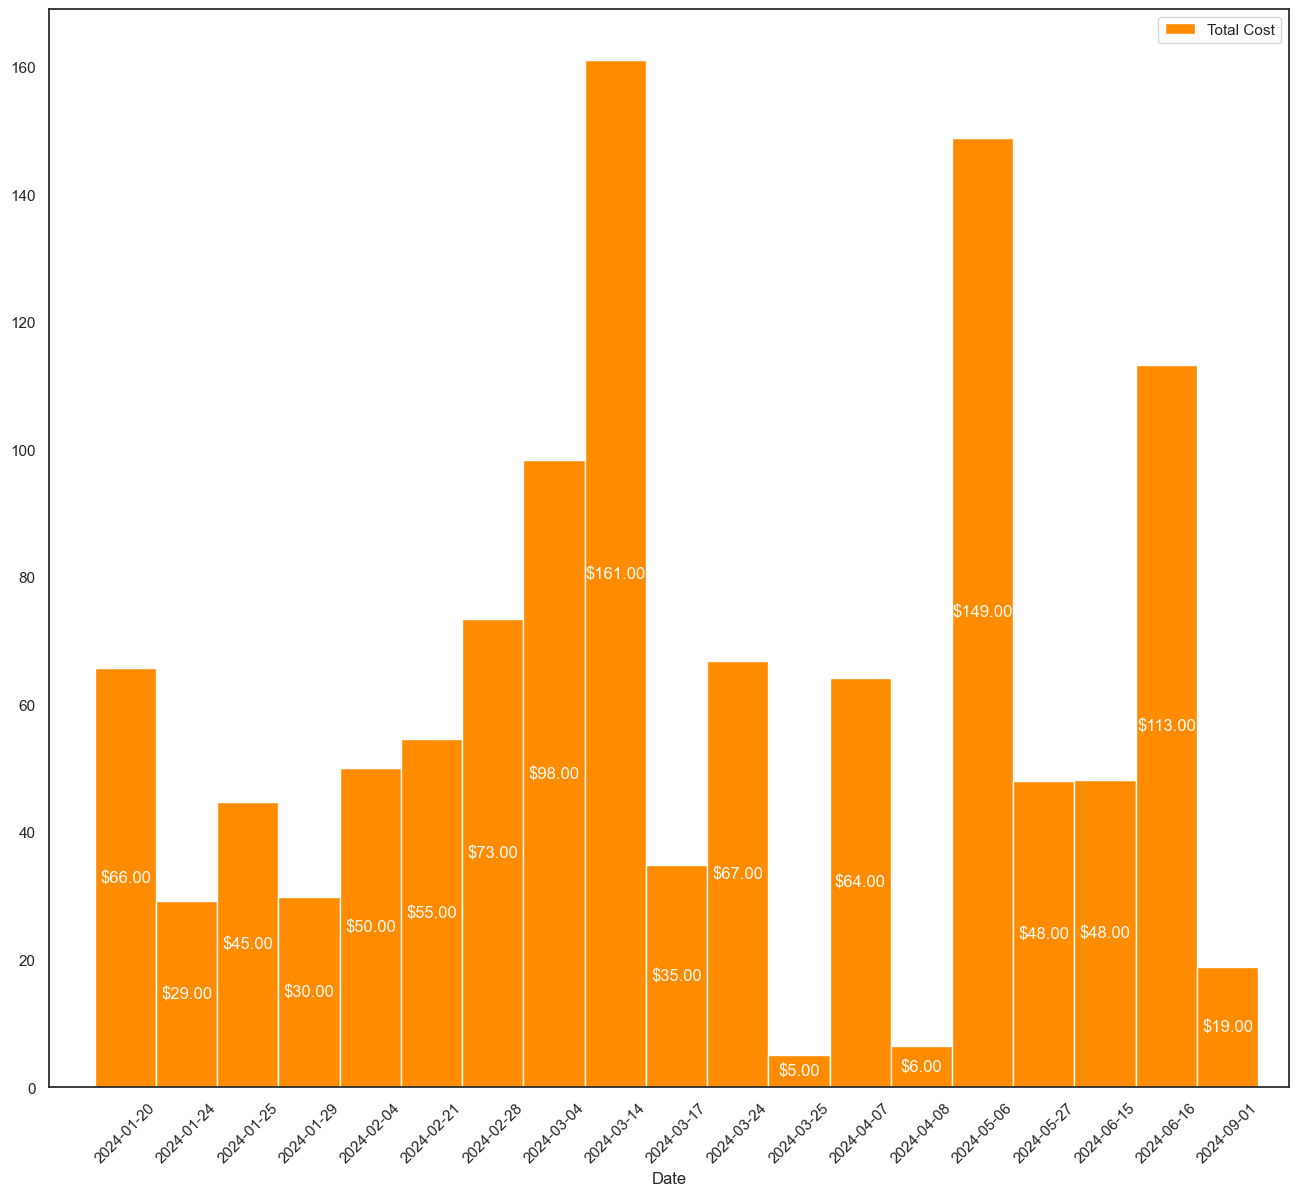

In [110]:
df['Total Cost'] = df['EBS Cost'] + df['EC2 Cost']
new_df = df[['Date', 'Total Cost']]


sns.set(style='white')
# plt.show()
ax = new_df.set_index('Date').plot(kind='bar', color=['darkorange'], figsize=(16,14), width=1);
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'${x:.0f}.00' if x > 0 else '', label_type='center', color='snow')
x0, x1 = ax.get_xlim()
ax.set_xlim(x0 -0.5, x1 + 0.25)
plt.xticks(rotation=45);
savefig('total_cost.png')

In [116]:
print('EBS Cost', df['EBS Cost'].mean())
print('EC2 Cost', df['EC2 Cost'].mean())

EBS Cost 32.639602658921056
EC2 Cost 28.486545137305264
